In [1]:
"""Script for analysing the results from the 16 different seeds from the 11 systems."""
# It also parses the gsd format trajectory stored in each output analysis folder (obtained by executing conv_traj.py before this script) to get the RDFs."""
import os
import shutil
from glob import glob

import freud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import signac
from matplotlib.ticker import MaxNLocator
from scipy import interpolate, stats
from scipy.stats import norm

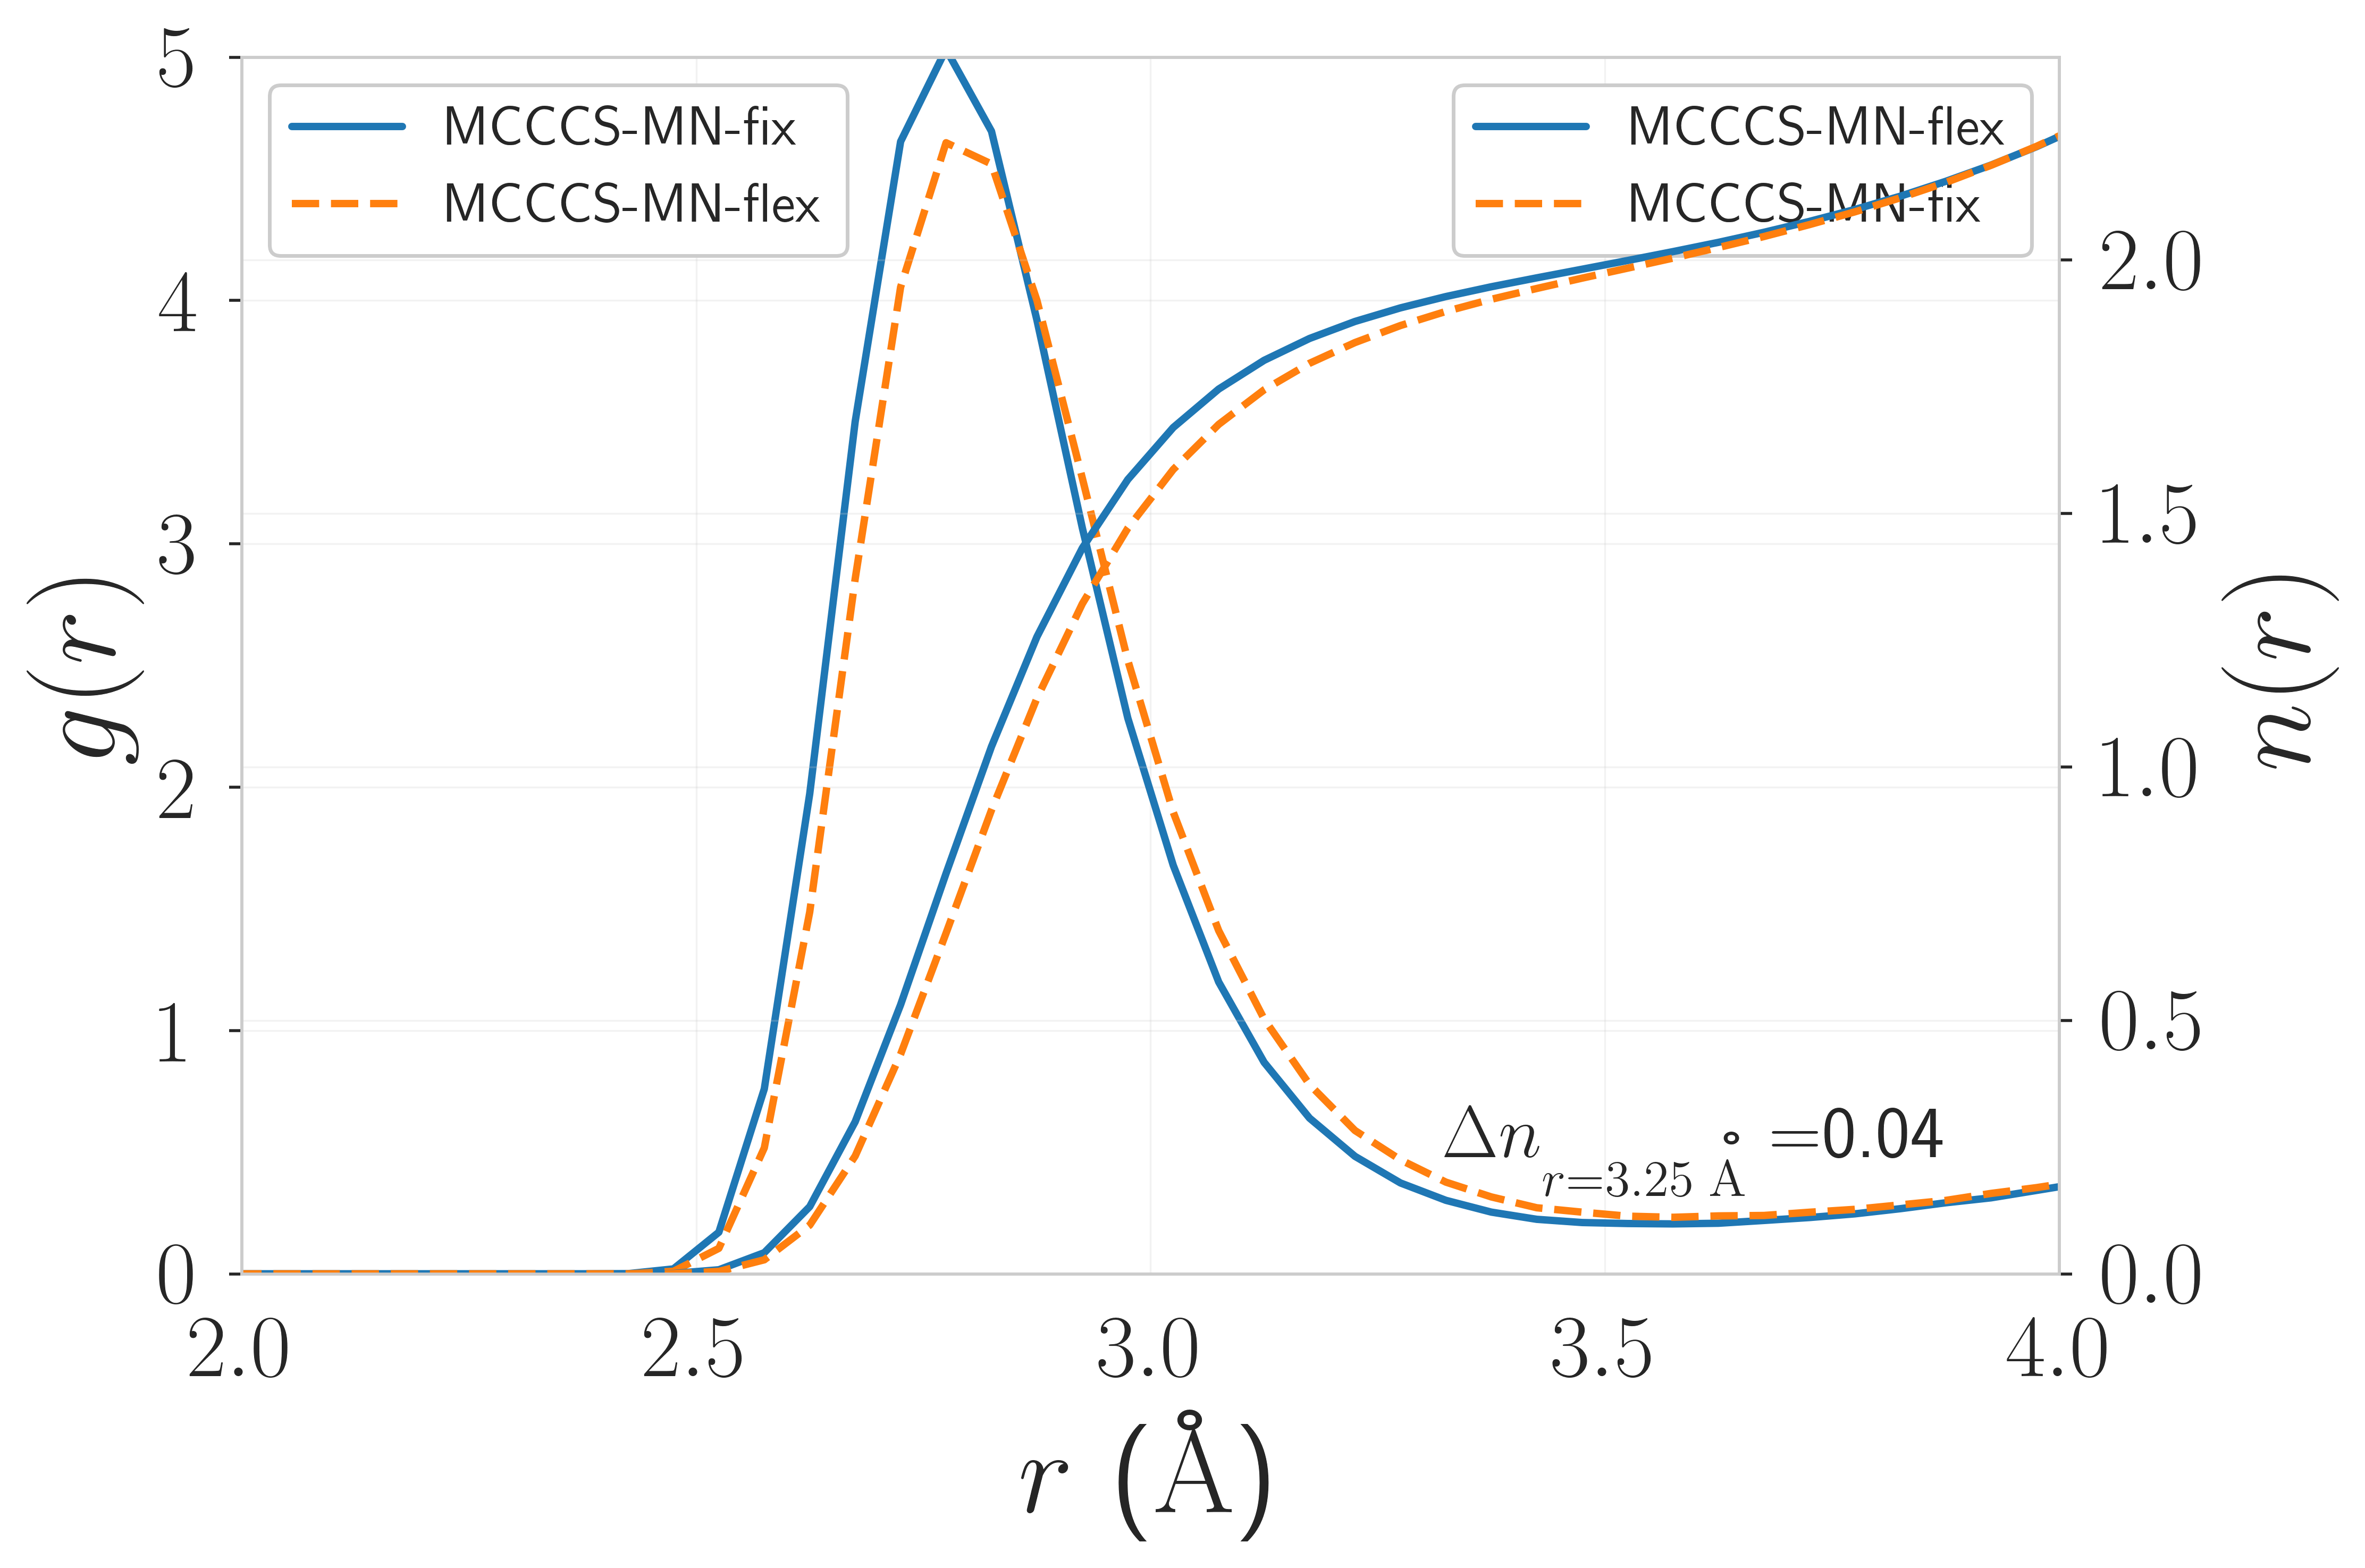

In [25]:
"""Read run files from all the independent seeds and get the final density and RDFs."""

file_flex = {}
file_rig = {}

temp = 280
file_flex[temp] = (
    f"../src/engines/mcccs/rdf_analysis_data/ethanolAA_NPT-flexOH_{temp:.1f}K_101.325kPa_cutoff_hard_lrc_energy_pressure/avg_rdf.txt"
    )
file_rig[temp] = (
    f"../src/engines/mcccs/rdf_analysis_data/ethanolAA_NPT-fixOH_{temp:.1f}K_101.325kPa_cutoff_hard_lrc_energy_pressure/avg_rdf.txt"
    )

rdf_flex = {}
rdf_rig = {}

rdf_flex[temp] = np.genfromtxt(file_flex[temp])
rdf_rig[temp] = np.genfromtxt(file_rig[temp])



sns.set_style("whitegrid")

# fig, axs = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(6, 9))
fig, ax3a = plt.subplots(1, 1, figsize=(9, 6))
# fig.subplots_adjust(hspace=0)
# fig.subplots_adjust(wspace=0)

# fig.suptitle('O-O RDF comparison', fontsize = titlefs)


ax3a.plot(
    rdf_flex[temp][:, 0], rdf_flex[temp][:, 1], label="MCCCS-MN-flex"
)
ax3a.plot(
    rdf_rig[temp][:, 0], rdf_rig[temp][:, 1], "--", label="MCCCS-MN-fix"
)

ax3a.grid(alpha=0.25)
# ax3a.title.set_text(r"$T = {}$".format(temp) + " K")
ax3a.set_ylim([0, 5])
ax3a.set_xlim([2, 6])
ax3a.yaxis.set_major_locator(plt.MaxNLocator(5))
ax3a.xaxis.set_major_locator(plt.MaxNLocator(4))

ax3a.legend(frameon=True)
ax3a.set_ylabel(r"$g(r)$")
ax3a.set_ylabel(r"$g(r)$")
ax3a.set_ylabel(r"$g(r)$")
ax3a.set_xlabel(r"$r$" + r" ($\mathrm{\AA}$)")

file_flex = {}
file_rig = {}

temps = [280, 300, 320]
temp = 280
file_flex[temp] = (
    f"../src/engines/mcccs/rdf_analysis_data/ethanolAA_NPT-flexOH_{temp:.1f}K_101.325kPa_cutoff_hard_lrc_energy_pressure/avg_cdf.txt"
    )

file_rig[temp] = (
     f"../src/engines/mcccs/rdf_analysis_data/ethanolAA_NPT-fixOH_{temp:.1f}K_101.325kPa_cutoff_hard_lrc_energy_pressure/avg_cdf.txt"
    )


cdf_flex = {}
cdf_rig = {}

cdf_flex[temp] = np.genfromtxt(file_flex[temp])
cdf_rig[temp] = np.genfromtxt(file_rig[temp])


sns.set_style("whitegrid")
# fig, axs = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(6, 9))
# fig.subplots_adjust(hspace=0)
# fig.subplots_adjust(wspace=0)
# fig, ax3b = plt.subplots(1, 1, figsize=(9, 6))
ax3b = ax3a.twinx()
# fig.suptitle('O-O CDF comparison', fontsize = titlefs)

# ax = {}
# ax3b, ax[1], ax[2] = axs[0], axs[1], axs[2]

ax3b.plot(
    rdf_flex[temp][:, 0], cdf_flex[temp][:, 1], label="MCCCS-MN-fix"
)
ax3b.plot(
    rdf_rig[temp][:, 0],
    cdf_rig[temp][:, 1],
    "--",
    label="MCCCS-MN-flex",
)

f = interpolate.interp1d(rdf_flex[temp][:, 0], cdf_flex[temp][:, 1])
g = interpolate.interp1d(rdf_rig[temp][:, 0], cdf_rig[temp][:, 1])

diff = f(3.25) - g(3.25)

ax3b.grid(alpha=0.25)
# ax3b.title.set_text(r"$T = {}$".format(temp) + " K")
ax3b.set_ylim([0, 2.4])
ax3b.set_xlim([2, 4])
ax3b.yaxis.set_major_locator(plt.MaxNLocator(5))
ax3b.xaxis.set_major_locator(plt.MaxNLocator(4))
ax3b.text(
    0.8,
    0.1,
    r"$\Delta n_{r=3.25\;\mathrm{\AA}}=$" + "{:.2f}".format(diff),
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax3b.transAxes,
    fontsize=20
)

ax3b.legend(frameon=True)
ax3b.set_ylabel(r"$n(r)$")
ax3b.set_xlabel(r"$r$" + r" ($\mathrm{\AA}$)")

plt.tight_layout()




In [24]:
file_flex = {}
file_rig = {}

temps = [280, 300, 320]
temp = 280
file_flex[temp] = (
    f"../src/engines/mcccs/rdf_analysis_data/ethanolAA_NPT-flexOH_{temp:.1f}K_101.325kPa_cutoff_hard_lrc_energy_pressure/avg_cdf.txt"
    )

file_rig[temp] = (
     f"../src/engines/mcccs/rdf_analysis_data/ethanolAA_NPT-fixOH_{temp:.1f}K_101.325kPa_cutoff_hard_lrc_energy_pressure/avg_cdf.txt"
    )


cdf_flex = {}
cdf_rig = {}

cdf_flex[temp] = np.genfromtxt(file_flex[temp])
cdf_rig[temp] = np.genfromtxt(file_rig[temp])


sns.set_style("whitegrid")
# fig, axs = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(6, 9))
# fig.subplots_adjust(hspace=0)
# fig.subplots_adjust(wspace=0)
# fig, ax3b = plt.subplots(1, 1, figsize=(9, 6))
ax3b = ax3a.twinx()
# fig.suptitle('O-O CDF comparison', fontsize = titlefs)

# ax = {}
# ax3b, ax[1], ax[2] = axs[0], axs[1], axs[2]

ax3b.plot(
    rdf_flex[temp][:, 0], cdf_flex[temp][:, 1], label="MCCCS-MN-fix"
)
ax3b.plot(
    rdf_rig[temp][:, 0],
    cdf_rig[temp][:, 1],
    "--",
    label="MCCCS-MN-flex",
)

f = interpolate.interp1d(rdf_flex[temp][:, 0], cdf_flex[temp][:, 1])
g = interpolate.interp1d(rdf_rig[temp][:, 0], cdf_rig[temp][:, 1])

diff = f(3.25) - g(3.25)

ax3b.grid(alpha=0.25)
# ax3b.title.set_text(r"$T = {}$".format(temp) + " K")
ax3b.set_ylim([0, 2.4])
ax3b.set_xlim([2, 4])
ax3b.yaxis.set_major_locator(plt.MaxNLocator(5))
ax3b.xaxis.set_major_locator(plt.MaxNLocator(4))
ax3b.text(
    0.8,
    0.1,
    r"$\Delta n_{r=3.25\;\mathrm{\AA}}=$" + "{:.2f}".format(diff),
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax3b.transAxes,
    fontsize=20
)

ax3b.legend(frameon=True)
ax3b.set_ylabel(r"$n(r)$")
ax3b.set_xlabel(r"$r$" + r" ($\mathrm{\AA}$)")

plt.tight_layout()
# plt.savefig("O-O_cdf_comparison.pdf", dpi=500)

# plt.close()


<Figure size 5000x4000 with 0 Axes>